# TASK 2: PREDICTION USING UNSUPERVISED MACHINE LEARNING

### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IMPORTING THE DATASET

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [4]:
X = dataset.iloc[:,:].values

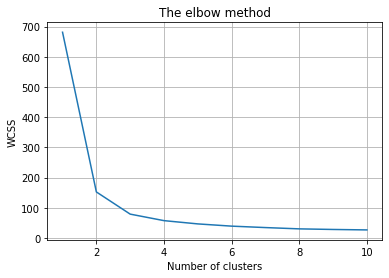

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

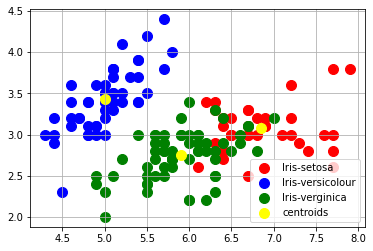

In [7]:
# Visualising the clusters - on the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
           s = 100, c = 'green', label = 'Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'yellow', label = 'centroids')
plt.legend()
plt.grid()
plt.show()

There are three clusters:
<p> Cluster 1: Iris-versicolour (Blue Colour)</p>
<p> Cluster 2: Iris-verginica (Green Colour)</p>
<p> Cluster 3: Iris-setosa (Red Colour)</p>
<p> Yellow points are the centriods of each cluster.</p>